## Plotting individual glaciers

In [1]:
from oggm import cfg, utils
cfg.initialize(logging_level='WARNING')

2024-07-04 11:28:31: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-07-04 11:28:31: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-07-04 11:28:31: oggm.cfg: Multiprocessing: using all available processors (N=8)


In [2]:
cfg.PARAMS['melt_f'], cfg.PARAMS['ice_density'], cfg.PARAMS['continue_on_error']

(5.0, 900.0, False)

In [3]:
cfg.PARAMS['use_multiprocessing'] = True

2024-07-03 14:27:54: oggm.cfg: Multiprocessing switched ON after user settings.


In [4]:
cfg.PATHS['working_dir'] = utils.gettempdir(dirname='OGGM-GettingStarted-10m', reset=True)
cfg.PATHS['working_dir']

'/var/folders/q4/r3b9pkcx6bn5djf1vxnj5xkr0000gn/T/OGGM/OGGM-GettingStarted-10m'

In [61]:
rgi_ids = ['RGI60-16.02944', 'RGI60-16.02942'] 

In [62]:
from oggm import workflow
from oggm import DEFAULT_BASE_URL
DEFAULT_BASE_URL

'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L3-L5_files/2023.3/elev_bands/W5E5_spinup'

In [63]:
gdirs = workflow.init_glacier_directories(
    rgi_ids,  # which glaciers?
    prepro_base_url=DEFAULT_BASE_URL,  # where to fetch the data?
    from_prepro_level=4,  # what kind of data? 
    prepro_border=80  # how big of a map?
)

2024-07-03 15:00:09: oggm.workflow: init_glacier_directories from prepro level 4 on 2 glaciers.
2024-07-03 15:00:09: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 2 glaciers


In [64]:
gdir = gdirs[0]  # take Unteraar glacier
print('Path to the DEM:', gdir.get_filepath('dem'))

Path to the DEM: /var/folders/q4/r3b9pkcx6bn5djf1vxnj5xkr0000gn/T/OGGM/OGGM-GettingStarted-10m/per_glacier/RGI60-16/RGI60-16.02/RGI60-16.02944/dem.tif


In [65]:
gdir = gdirs[0]  # take Unteraar glacier
print('Path to the DEM:', gdir.get_filepath('dem'))

Path to the DEM: /var/folders/q4/r3b9pkcx6bn5djf1vxnj5xkr0000gn/T/OGGM/OGGM-GettingStarted-10m/per_glacier/RGI60-16/RGI60-16.02/RGI60-16.02944/dem.tif


In [66]:
gdir

<oggm.GlacierDirectory>
  RGI id: RGI60-16.02944
  Region: 16: Low Latitudes
  Subregion: 16-01: Low-latitude Andes              
  Glacier type: Glacier
  Terminus type: Land-terminating
  Status: Glacier or ice cap
  Area: 9.337 km2
  Lon, Lat: (-78.428, -0.68772)
  Grid (nx, ny): (214, 252)
  Grid (dx, dy): (53.0, -53.0)

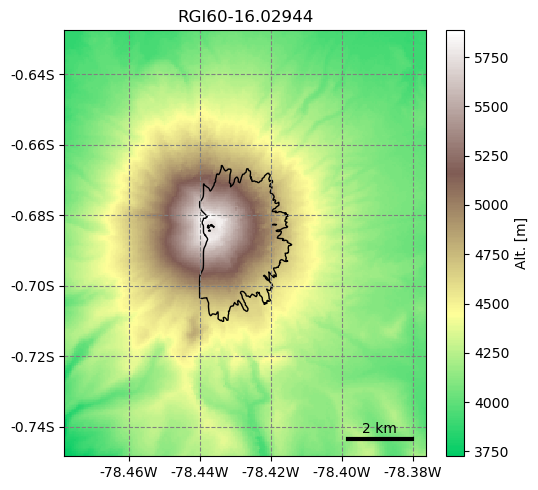

In [67]:
from oggm import graphics
graphics.plot_domain(gdir, figsize=(6, 5))

## Plotting basin + glaciers

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import shapely.geometry as shpg
import os

In [2]:
from oggm import cfg, utils, workflow, tasks, graphics

In [3]:
# work with parameters 
cfg.initialize(logging_level='WARNING')
cfg.PATHS['working_dir']=path

cfg.PARAMS['store_model_geometry'] = True
cfg.PARAMS['use_multiprocessing'] = True
cfg.PARAMS['continue_on_error']=True #this is to avoid issues with the files with invalid geometries

#You can provide any other dataset to OGGM by setting the climate_file parameter in params.cfg

2024-07-05 18:22:12: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-07-05 18:22:12: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-07-05 18:22:12: oggm.cfg: Multiprocessing: using all available processors (N=8)


NameError: name 'path' is not defined

In [4]:
utils.get_rgi_dir(version='70G')  # path to the data after download

UnboundLocalError: cannot access local variable 'dfile' where it is not associated with a value

In [5]:
# Get rgi region file for region 16 (South America)
fr = utils.get_rgi_region_file(17, version='62')

In [6]:
# Read file as as geopandas
gdf = gpd.read_file(fr)

In [7]:
# This new shp file only contains 2 glaciers and only one of them can be ran; surely this is not correct
# Add basin shapefile
path = '~/Documents/summer24/sa_basins/santiago_basins_dissolved.shp' 
basin = gpd.read_file(path)

In [8]:
import shapely.geometry as shpg
in_bas = [basin.geometry.contains(shpg.Point(x, y))[0] for
          (x, y) in zip(gdf.CenLon, gdf.CenLat)]
gdf_sel = gdf.loc[in_bas]

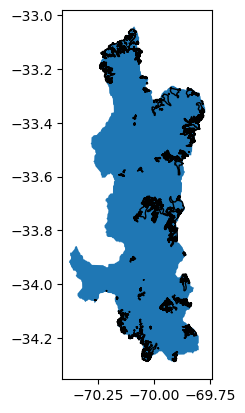

In [9]:
ax = basin.plot();
gdf_sel.plot(ax=ax, edgecolor='k');

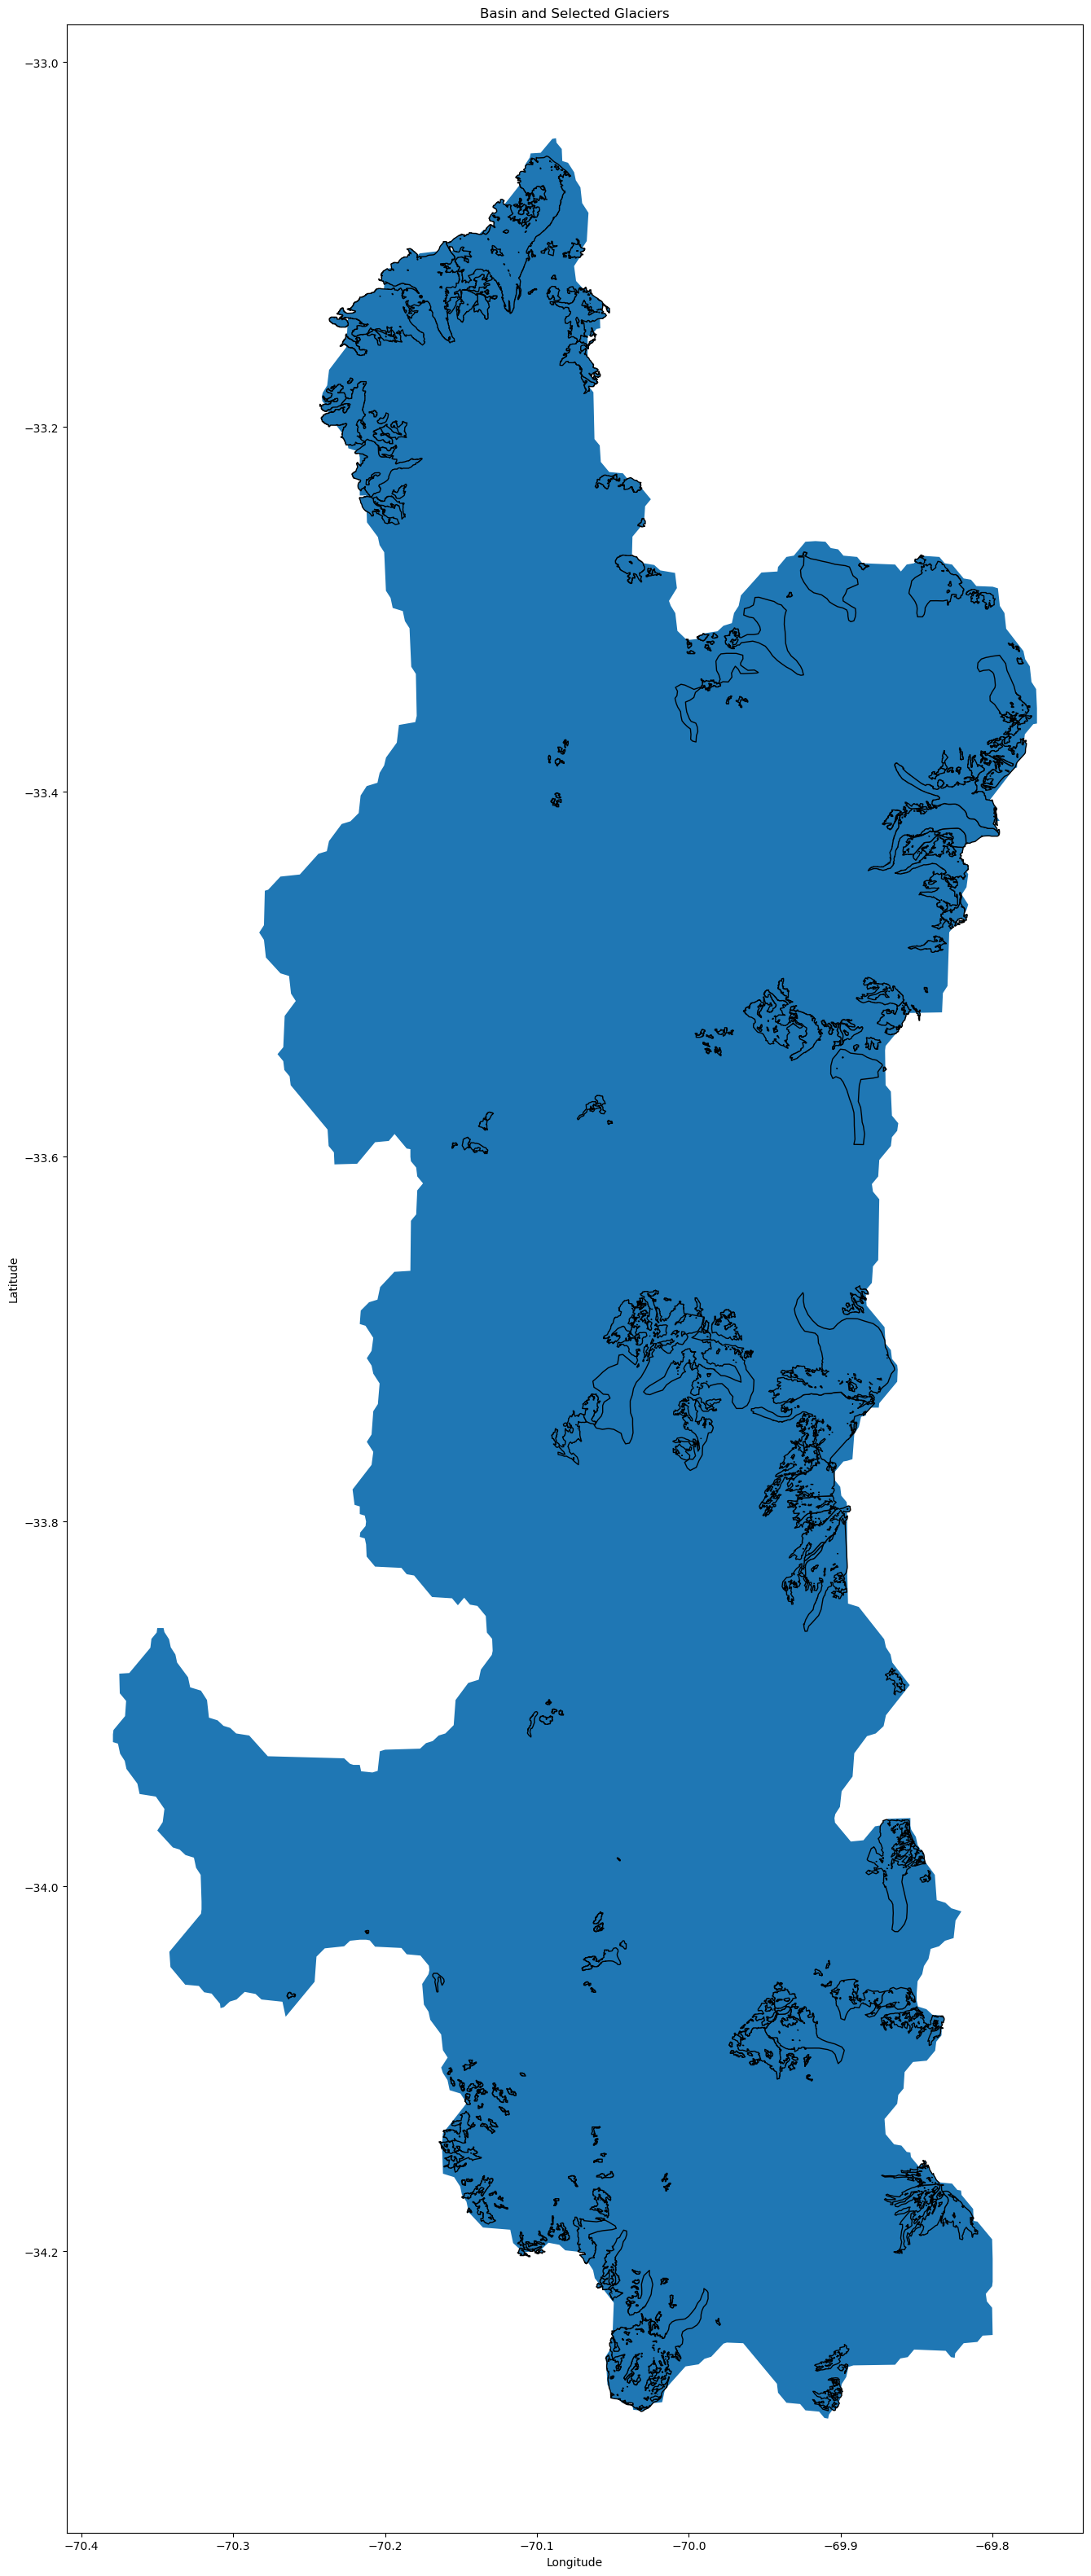

In [10]:
# Create a larger figure
fig, ax = plt.subplots(figsize=(50, 40))  # Adjust the size as needed

# Plot the basin and glaciers
basin.plot(ax=ax)
gdf_sel.plot(ax=ax, edgecolor='k')

# Optionally, add titles, labels, or other customizations
ax.set_title('Basin and Selected Glaciers')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [11]:
# The RGI Id of the glaciers you want to look for
# Use the original shapefiles or the GLIMS viewer to check for the ID: https://www.glims.org/maps/glims
rgi_id = 'RGI2000-v7.0-G-01-06486'  # Denali

# The default is to test for all sources available for this glacier
# Set to a list of source names to override this
sources = None
# Where to write the plots. Default is in the current working directory
plot_dir = f'outputs/{rgi_id}'
# The RGI version to use
# V62 is an unofficial modification of V6 with only minor, backwards compatible modifications
prepro_rgi_version = 62
# Size of the map around the glacier. Currently only 10 and 40 are available
prepro_border = 10
# Degree of processing level.  Currently only 1 is available.
from_prepro_level = 1

In [12]:
# The sources can be given as parameters
if sources is not None and isinstance(sources, str):
    sources = sources.split(',')

In [13]:
# Plotting directory as well
if not plot_dir:
    plot_dir = './' + rgi_id
import os
plot_dir = os.path.abspath(plot_dir)

In [14]:
from oggm import cfg, utils, workflow, tasks, graphics, GlacierDirectory
import pandas as pd
import numpy as np
import xarray as xr
import rioxarray as rioxr
import geopandas as gpd
import salem
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import itertools

from oggm.utils import DEM_SOURCES
from oggm.workflow import init_glacier_directories

In [15]:
# URL of the preprocessed GDirs
gdir_url = 'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/rgitopo/2023.1/'
# We use OGGM to download the data
gdir = init_glacier_directories([rgi_id], from_prepro_level=1, prepro_border=10,  prepro_rgi_version='70', prepro_base_url=gdir_url)[0]



2024-07-04 11:36:44: oggm.workflow: init_glacier_directories from prepro level 1 on 1 glaciers.
2024-07-04 11:36:44: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
100% of 157.7 MiB |######################| Elapsed Time: 0:00:07 Time:  0:00:0700


NotADirectoryError: [Errno 20] Not a directory: '/Users/ziggygoddard/Documents/summer24/sa_basins/santiago_basins_subset_dissolved.shp/per_glacier'

# new stuff

In [13]:
import os
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import shapely.geometry as shpg

from oggm import cfg, utils, workflow, tasks, graphics

# Define the directory path in your home directory
path = '/Users/ziggygoddard/Documents/summer24/OGGM_output' 

# Initialize OGGM
cfg.initialize(logging_level='WARNING')
cfg.PATHS['working_dir'] = path

cfg.PARAMS['store_model_geometry'] = True
cfg.PARAMS['use_multiprocessing'] = True
cfg.PARAMS['continue_on_error'] = True  # this is to avoid issues with the files with invalid geometries

# Manually set the path to the RGI directory
rgi_path = '/Users/ziggygoddard/Documents/summer24/RGI2000-v7.0-G-16_low_latitudes/'
if os.path.exists(rgi_path):
    cfg.PATHS['rgi_dir'] = rgi_path
    print(f"RGI directory set to: {rgi_path}")
else:
    raise FileNotFoundError(f"RGI directory not found: {rgi_path}")

# Verify the directory
print("Checking RGI directory...")
rgi_dir = cfg.PATHS['rgi_dir']
print(f"Using RGI directory: {rgi_dir}")

# List the first 5 files in the RGI directory for verification
rgi_files = os.listdir(rgi_dir)
print(f"Files in RGI directory: {rgi_files[:5]}")

# Read the RGI shapefile directly using geopandas
shapefile_path = os.path.join(rgi_dir, 'RGI2000-v7.0-G-16_low_latitudes.shp')
if os.path.exists(shapefile_path):
    gdf = gpd.read_file(shapefile_path)
else:
    raise FileNotFoundError(f"Shapefile not found: {shapefile_path}")

# Print the columns of the GeoDataFrame
print("Columns in the GeoDataFrame:", gdf.columns)

# Add basin shapefile
basin_path = '/Users/ziggygoddard/Documents/summer24/sa_basins/quito_basins_dissolved.shp' 
basin = gpd.read_file(basin_path)

# Select glaciers within the basin
# Use the correct column names for longitude and latitude
lon_col = 'cenlon'  # Replace with the correct column name for longitude
lat_col = 'cenlat'  # Replace with the correct column name for latitude

if lon_col not in gdf.columns or lat_col not in gdf.columns:
    raise ValueError(f"GeoDataFrame does not contain columns '{lon_col}' and '{lat_col}'")

in_bas = [basin.geometry.contains(shpg.Point(x, y))[0] for (x, y) in zip(gdf[lon_col], gdf[lat_col])]
gdf_sel = gdf.loc[in_bas]

# Print the first few rows of gdf_sel to inspect the data
print(gdf_sel.head())

# Print the columns of gdf_sel to find the correct RGIId column name
print("Columns in gdf_sel:", gdf_sel.columns)

# Use the correct column name for RGI IDs
rgi_id_col = 'rgi_id'  # Replace with the correct column name for RGI IDs

if rgi_id_col not in gdf_sel.columns:
    raise ValueError(f"GeoDataFrame does not contain column '{rgi_id_col}'")

# Select rgi id's from the gdf_sel file
rgi_ids = gdf_sel[rgi_id_col]

# Check if each RGI ID file exists
for rgi_id in rgi_ids:
    glacier_path = os.path.join(cfg.PATHS['working_dir'], 'per_glacier', rgi_id, 'outlines.tar.gz')
    if not os.path.exists(glacier_path):
        print(f"Warning: File not found for RGI ID {rgi_id}: {glacier_path}")

# Proceed with your OGGM workflow using the selected glaciers
# Example task: run the prepro tasks on these glaciers
# Make sure to initialize the GlacierDirectory instances
gdirs = workflow.init_glacier_directories(rgi_ids)

# Example task: glacier masks
tasks.glacier_masks(gdirs)



2024-07-09 15:12:10: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-07-09 15:12:10: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-07-09 15:12:10: oggm.cfg: Multiprocessing: using all available processors (N=8)
2024-07-09 15:12:11: oggm.cfg: PARAMS['store_model_geometry'] changed from `False` to `True`.
2024-07-09 15:12:11: oggm.cfg: Multiprocessing switched ON after user settings.
2024-07-09 15:12:11: oggm.cfg: PARAMS['continue_on_error'] changed from `False` to `True`.


RGI directory set to: /Users/ziggygoddard/Documents/summer24/RGI2000-v7.0-G-16_low_latitudes/
Checking RGI directory...
Using RGI directory: /Users/ziggygoddard/Documents/summer24/RGI2000-v7.0-G-16_low_latitudes/
Files in RGI directory: ['.DS_Store', 'RGI2000-v7.0-G-16_low_latitudes.prj', 'RGI2000-v7.0-G-16_low_latitudes-submission_info.csv', 'RGI2000-v7.0-G-16_low_latitudes-attributes.csv', 'README.md']
Columns in the GeoDataFrame: Index(['rgi_id', 'o1region', 'o2region', 'glims_id', 'anlys_id', 'subm_id',
       'src_date', 'cenlon', 'cenlat', 'utm_zone', 'area_km2', 'primeclass',
       'conn_lvl', 'surge_type', 'term_type', 'glac_name', 'is_rgi6',
       'termlon', 'termlat', 'zmin_m', 'zmax_m', 'zmed_m', 'zmean_m',
       'slope_deg', 'aspect_deg', 'aspect_sec', 'dem_source', 'lmax_m',
       'geometry'],
      dtype='object')


2024-07-09 15:12:25: oggm.workflow: Execute entity tasks [GlacierDirectory] on 2 glaciers


                     rgi_id o1region o2region        glims_id  anlys_id  \
27  RGI2000-v7.0-G-16-00028       16    16-01  G281559E00671S    939217   
31  RGI2000-v7.0-G-16-00032       16    16-01  G281855E00490S    311697   

    subm_id             src_date     cenlon    cenlat  utm_zone  ...  \
27      753  1997-09-09T00:00:00 -78.441397 -0.672424        17  ...   
31      591  2000-06-15T00:00:00 -78.150606 -0.486301        17  ...   

       zmin_m     zmax_m     zmed_m    zmean_m  slope_deg  aspect_deg  \
27  5063.4434  5599.7446  5340.8790  5341.8020  33.438970  355.245625   
31  4489.7373  5702.9873  5043.9614  5079.4937  27.812273  238.879745   

    aspect_sec  dem_source  lmax_m  \
27           1    COPDEM30     858   
31           6    COPDEM30    5018   

                                             geometry  
27  POLYGON Z ((-78.43916 -0.67089 0.00000, -78.43...  
31  POLYGON Z ((-78.14047 -0.46551 0.00000, -78.14...  

[2 rows x 29 columns]
Columns in gdf_sel: Index(['rgi

DriverError: '/vsitar//Users/ziggygoddard/Documents/summer24/OGGM_output/per_glacier/RGI2000-v7.0-G-16/RGI2000-v7.0-G-16-00/RGI2000-v7.0-G-16-00028/outlines.tar.gz' does not exist in the file system, and is not recognized as a supported dataset name.

In [10]:
rgi_ids

27    RGI2000-v7.0-G-16-00028
31    RGI2000-v7.0-G-16-00032
Name: rgi_id, dtype: object

# Everything below is a mess of various things I've tried.

In [15]:
import os
from oggm import utils, cfg
from oggm import workflow, tasks

# Set up your working directory
WORKING_DIR = '/Users/ziggygoddard/Documents/summer24/OGGM_output'
cfg.initialize()
cfg.PATHS['working_dir'] = WORKING_DIR

# Set up logging
cfg.PARAMS['use_multiprocessing'] = True

# Specify the local path to the RGI version 70G
local_rgi_dir = '/Users/ziggygoddard/Documents/summer24/RGI2000-v7.0-G-16_low_latitudes/RGI2000-v7.0-G-16_low_latitudes.shp'
region = '16'

# Function to get the RGI file path
def get_local_rgi_file(region, version='70G'):
    rgi_files = glob.glob(os.path.join(local_rgi_dir, f'RGI{version}*_{region}_*.shp'))
    assert len(rgi_files) == 1, f"Expected one file, found {len(rgi_files)}"
    return rgi_files[0]

# Use the function to get the RGI file path
rgi_file = get_local_rgi_file(region)

# Proceed with your OGGM workflow using the local RGI file
gdirs = workflow.init_glacier_directories(rgi_file)

2024-07-09 15:13:50: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-07-09 15:13:50: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-07-09 15:13:50: oggm.cfg: Multiprocessing: using all available processors (N=8)
2024-07-09 15:13:50: oggm.cfg: Multiprocessing switched ON after user settings.


NameError: name 'glob' is not defined

In [1]:
import os
import geopandas as gpd
import shapely.geometry as shpg
from oggm import cfg, workflow, utils

# Define the directory path where you have the RGI v70G files
rgi_path = '/Users/ziggygoddard/Documents/summer24/RGI2000-v7.0-G-16_low_latitudes/'

# Initialize OGGM
cfg.initialize(logging_level='WARNING')
cfg.PATHS['working_dir'] = '/Users/ziggygoddard/Documents/summer24/OGGM_output'

# Read the RGI shapefile directly using geopandas
shapefile_path = os.path.join(rgi_path, 'RGI2000-v7.0-G-16_low_latitudes.shp')
gdf = gpd.read_file(shapefile_path)

# Print the columns of the GeoDataFrame
print("Columns in the GeoDataFrame:", gdf.columns)

# Add basin shapefile
basin_path = '/Users/ziggygoddard/Documents/summer24/sa_basins/quito_basins_dissolved.shp' 
basin = gpd.read_file(basin_path)

# Select glaciers within the basin
lon_col = 'cenlon'  # Replace with the correct column name for longitude
lat_col = 'cenlat'  # Replace with the correct column name for latitude

if lon_col not in gdf.columns or lat_col not in gdf.columns:
    raise ValueError(f"GeoDataFrame does not contain columns '{lon_col}' and '{lat_col}'")

in_bas = [basin.geometry.contains(shpg.Point(x, y))[0] for (x, y) in zip(gdf[lon_col], gdf[lat_col])]
gdf_sel = gdf.loc[in_bas]

# Print the first few rows of gdf_sel to inspect the data
print(gdf_sel.head())

# Print the columns of gdf_sel to find the correct RGIId column name
print("Columns in gdf_sel:", gdf_sel.columns)

# Use the correct column name for RGI IDs
rgi_id_col = 'rgi_id'  # Replace with the correct column name for RGI IDs

if rgi_id_col not in gdf_sel.columns:
    raise ValueError(f"GeoDataFrame does not contain column '{rgi_id_col}'")

# Select RGI IDs from gdf_sel
rgi_ids = gdf_sel[rgi_id_col]

# Initialize GlacierDirectories
gdirs = workflow.init_glacier_directories(rgi_ids)

# Proceed with your OGGM workflow using the selected glaciers
# Example task: glacier masks
workflow.execute_entity_task(tasks.glacier_masks, gdirs)

# Continue with your workflow here



2024-07-04 14:55:58: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-07-04 14:55:58: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-07-04 14:55:58: oggm.cfg: Multiprocessing: using all available processors (N=8)


Columns in the GeoDataFrame: Index(['rgi_id', 'o1region', 'o2region', 'glims_id', 'anlys_id', 'subm_id',
       'src_date', 'cenlon', 'cenlat', 'utm_zone', 'area_km2', 'primeclass',
       'conn_lvl', 'surge_type', 'term_type', 'glac_name', 'is_rgi6',
       'termlon', 'termlat', 'zmin_m', 'zmax_m', 'zmed_m', 'zmean_m',
       'slope_deg', 'aspect_deg', 'aspect_sec', 'dem_source', 'lmax_m',
       'geometry'],
      dtype='object')


2024-07-04 14:56:02: oggm.workflow: Execute entity tasks [GlacierDirectory] on 2 glaciers


                     rgi_id o1region o2region        glims_id  anlys_id  \
27  RGI2000-v7.0-G-16-00028       16    16-01  G281559E00671S    939217   
31  RGI2000-v7.0-G-16-00032       16    16-01  G281855E00490S    311697   

    subm_id             src_date     cenlon    cenlat  utm_zone  ...  \
27      753  1997-09-09T00:00:00 -78.441397 -0.672424        17  ...   
31      591  2000-06-15T00:00:00 -78.150606 -0.486301        17  ...   

       zmin_m     zmax_m     zmed_m    zmean_m  slope_deg  aspect_deg  \
27  5063.4434  5599.7446  5340.8790  5341.8020  33.438970  355.245625   
31  4489.7373  5702.9873  5043.9614  5079.4937  27.812273  238.879745   

    aspect_sec  dem_source  lmax_m  \
27           1    COPDEM30     858   
31           6    COPDEM30    5018   

                                             geometry  
27  POLYGON Z ((-78.43916 -0.67089 0.00000, -78.43...  
31  POLYGON Z ((-78.14047 -0.46551 0.00000, -78.14...  

[2 rows x 29 columns]
Columns in gdf_sel: Index(['rgi

DriverError: '/vsitar//Users/ziggygoddard/Documents/summer24/OGGM_output/per_glacier/RGI2000-v7.0-G-16/RGI2000-v7.0-G-16-00/RGI2000-v7.0-G-16-00028/outlines.tar.gz' does not exist in the file system, and is not recognized as a supported dataset name.

## Making a tar file

In [9]:
import tarfile
import os

# Directory containing the extracted RGI files
source_dir = '/Users/ziggygoddard/Documents/summer24/RGI2000-v7.0-G-16_low_latitudes'
# Path for the tar file
tar_path = '/Users/ziggygoddard/Documents/summer24/RGI2000-v7.0-G-16_low_latitudes.tar.gz'

# Create a tar file
with tarfile.open(tar_path, "w:gz") as tar:
    tar.add(source_dir, arcname=os.path.basename(source_dir))

print(f"Tar file created at: {tar_path}")


Tar file created at: /Users/ziggygoddard/Documents/summer24/RGI2000-v7.0-G-16_low_latitudes.tar.gz


In [12]:
import tarfile
import os

# Path to the tar file containing RGI data
tar_path = '/Users/ziggygoddard/Documents/summer24/RGI2000-v7.0-G-16_low_latitudes.tar.gz'

# Directory where RGI data will be extracted
extract_path = '/Users/ziggygoddard/Documents/summer24/RGI2000-v7.0-G-16_low_latitudes'

# Check if the tar file exists
if not os.path.exists(tar_path):
    raise FileNotFoundError(f"RGI tar file not found: {tar_path}")

# Extract the tar file
if not os.path.exists(extract_path):
    os.makedirs(extract_path)
    with tarfile.open(tar_path, "r:gz") as tar:
        tar.extractall(path=extract_path)
    print(f"Extracted files to: {extract_path}")
else:
    print(f"RGI data already extracted at: {extract_path}")


Extracted files to: /Users/ziggygoddard/Documents/summer24/RGI2000-v7.0-G-16_low_latitudes


In [14]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import shapely.geometry as shpg
import os

from oggm import cfg, utils, workflow, tasks, graphics

# Define paths
rgi_path = '/Users/ziggygoddard/Documents/summer24/RGI2000-v7.0-G-16_low_latitudes'
output_path = '/Users/ziggygoddard/Documents/summer24/OGGM_output'

# Initialize OGGM
cfg.initialize(logging_level='WARNING')
cfg.PATHS['working_dir'] = output_path  # Use separate path for output
cfg.PATHS['rgi_dir'] = rgi_path  # Set path to extracted RGI data

cfg.PARAMS['store_model_geometry'] = True
cfg.PARAMS['use_multiprocessing'] = True
cfg.PARAMS['continue_on_error'] = True  # Avoid issues with invalid geometries

# Read the RGI shapefile directly using geopandas
shapefile_path = os.path.join(rgi_path, 'RGI2000-v7.0-G-16_low_latitudes.shp')
gdf = gpd.read_file(shapefile_path)

# Add basin shapefile
basin_path = '/Users/ziggygoddard/Documents/summer24/sa_basins/quito_basins_dissolved.shp'
basin = gpd.read_file(basin_path)

# Select glaciers within the basin
in_bas = [basin.geometry.contains(shpg.Point(x, y))[0] for
          (x, y) in zip(gdf.cenlon, gdf.cenlat)]
gdf_sel = gdf.loc[in_bas]

# Select rgi id's from the gdf_sel file
rgi_ids = gdf_sel['rgi_id']

# Proceed with your OGGM workflow using the selected glaciers
# Example task: run the prepro tasks on these glaciers
# Make sure to initialize the GlacierDirectory instances
gdirs = workflow.init_glacier_directories(rgi_ids, from_prepro_level=5, prepro_base_url='https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L3-L5_files/2023.3/elev_bands/W5E5_spinup', prepro_border=80)

# Example task: glacier masks
tasks.glacier_masks(gdirs)

# You can add more tasks as needed for your analysis



2024-07-05 17:12:25: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-07-05 17:12:25: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-07-05 17:12:25: oggm.cfg: Multiprocessing: using all available processors (N=8)
2024-07-05 17:12:25: oggm.cfg: PARAMS['store_model_geometry'] changed from `False` to `True`.
2024-07-05 17:12:25: oggm.cfg: Multiprocessing switched ON after user settings.
2024-07-05 17:12:25: oggm.cfg: PARAMS['continue_on_error'] changed from `False` to `True`.
2024-07-05 17:12:28: oggm.workflow: init_glacier_directories from prepro level 5 on 2 glaciers.
2024-07-05 17:12:28: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 2 glaciers


RuntimeError: Could not find file at https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L3-L5_files/2023.3/elev_bands/W5E5_spinup/RGI62/b_080/L5/RGI2000-v7.0-G-16/RGI2000-v7.0-G-16-00.tar

In [4]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import shapely.geometry as shpg
import os

from oggm import cfg, utils, workflow, tasks, graphics

# Initialize OGGM configuration and set working directory
cfg.initialize(logging_level='WARNING')
cfg.PATHS['working_dir'] = '/Users/ziggygoddard/Documents/summer24/OGGM_output/'

# Set OGGM parameters
cfg.PARAMS['store_model_geometry'] = True
cfg.PARAMS['use_multiprocessing'] = True
cfg.PARAMS['continue_on_error'] = True  # to avoid issues with invalid geometries

# Assuming you have already downloaded RGI v70G data and read it into gdf_sel
# Rename columns to match OGGM's expected format
gdf_sel.rename(columns={'rgi_id': 'RGIId', 'cenlon': 'CenLon', 'cenlat': 'CenLat'}, inplace=True)

# Initialize glacier directories
gdirs = workflow.init_glacier_directories(gdf_sel['RGIId'])

# Run tasks with glacier directories
for gdir in gdirs:
    tasks.glacier_masks(gdir)  # Example of an OGGM task
    tasks.run_with_hydro(gdir, run_task=tasks.run_constant_climate, nyears=100, y0=2014, halfsize=5, store_monthly_hydro=True, output_filesuffix='_ct')

# Export data from OGGM run and compile output
output_path = '~/Documents/summer24/{}_ct_compiled_output.nc'.format(datetime.date.today())
utils.compile_run_output(gdirs, input_filesuffix='_ct', path=output_path)

# Load compiled output data (after it's saved)
export_date = '2024-07-04'
input_path = '~/Documents/summer24/{}_ct_compiled_output.nc'.format(export_date)
ct_ds = xr.open_dataset(input_path)

# Plotting or further analysis can follow here
# Example:
plt.figure(figsize=(10, 6))
ct_ds['volume'].plot()
plt.title('Glacier Volume Change Over Time')
plt.xlabel('Year')
plt.ylabel('Volume (km³)')
plt.grid(True)
plt.show()


2024-07-04 15:17:01: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-07-04 15:17:01: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-07-04 15:17:01: oggm.cfg: Multiprocessing: using all available processors (N=8)
2024-07-04 15:17:01: oggm.cfg: PARAMS['store_model_geometry'] changed from `False` to `True`.
2024-07-04 15:17:01: oggm.cfg: Multiprocessing switched ON after user settings.
2024-07-04 15:17:01: oggm.cfg: PARAMS['continue_on_error'] changed from `False` to `True`.
/var/folders/q4/r3b9pkcx6bn5djf1vxnj5xkr0000gn/T/ipykernel_3193/1788655585.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_sel.rename(columns={'rgi_id': 'RGIId', 'cenlon': 'CenLon', 'cenlat': 'CenLat'}, inplace=True)
2024-07-04 15:17:01: oggm.workflow: Exe

DriverError: '/vsitar//Users/ziggygoddard/Documents/summer24/OGGM_output/per_glacier/RGI2000-v7.0-G-16/RGI2000-v7.0-G-16-00/RGI2000-v7.0-G-16-00028/outlines.tar.gz' does not exist in the file system, and is not recognized as a supported dataset name.

In [7]:
import os
from oggm import cfg, workflow
from oggm.utils import get_rgi_region_file

# Initialize OGGM configuration
cfg.initialize()

# Set working directory for OGGM outputs
cfg.PATHS['working_dir'] = '/Users/ziggygoddard/Documents/summer24/OGGM_output/'

# Specify your manually downloaded RGI v70G base directory
base_dir = '/Users/ziggygoddard/Documents/summer24/RGI2000-v7.0-G-16_low_latitudes/'

# Assuming you have specific glacier IDs or want to process all in the directory
# Replace with your specific RGI IDs or leave empty to process all in the directory
rgi_ids = []

# Initialize glacier directories
gdirs = workflow.init_glacier_directories(base_dir=base_dir, rgi_ids=rgi_ids)

# Run tasks with glacier directories
for gdir in gdirs:
    # Replace with your specific tasks
    # Example: utils.compile_glacier_statistics(gdir)
    pass

# Continue with your workflow...


2024-07-04 15:24:24: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-07-04 15:24:24: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-07-04 15:24:24: oggm.cfg: Multiprocessing: using all available processors (N=8)


TypeError: init_glacier_directories() got an unexpected keyword argument 'base_dir'

In [13]:
from oggm import cfg, workflow

# Initialize OGGM configuration
cfg.initialize()

# Set the working directory where OGGM will store its outputs
cfg.PATHS['working_dir'] = '/Users/ziggygoddard/Documents/summer24/OGGM_output/'


2024-07-04 15:28:38: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-07-04 15:28:38: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-07-04 15:28:38: oggm.cfg: Multiprocessing: using all available processors (N=8)


In [14]:
from oggm.utils import get_rgi_dir

# Specify the version of RGI data you want to use
version = '70G'

# Get the RGI directory for the specified version
rgi_dir = get_rgi_dir(version=version)

# Initialize glacier directories
gdirs = workflow.init_glacier_directories(rgi_dir=rgi_dir)


UnboundLocalError: cannot access local variable 'dfile' where it is not associated with a value

In [15]:
from oggm.utils import get_rgi_dir, get_rgi_region_file

# Ensure RGI v70G data is available locally
rgi_dir = get_rgi_dir(version='70G')


UnboundLocalError: cannot access local variable 'dfile' where it is not associated with a value

In [21]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import shapely.geometry as shpg
import os

from oggm import cfg, utils, workflow, tasks, graphics
from oggm.exceptions import InvalidParamsError

# Initialize OGGM parameters
cfg.initialize(logging_level='WARNING')
cfg.PATHS['working_dir'] = '/Users/ziggygoddard/Documents/summer24/OGGM_output'  # Update this path to your working directory

cfg.PARAMS['store_model_geometry'] = True
cfg.PARAMS['use_multiprocessing'] = True
cfg.PARAMS['continue_on_error'] = True  # This is to avoid issues with the files with invalid geometries

# Explicitly set the base URL for preprocessed directories
base_url = 'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L3-L5_files/2023.3/elev_bands/W5E5_spinup'
cfg.PATHS['dl_cache_dir'] = os.path.join(cfg.PATHS['working_dir'], 'dl_cache')
cfg.PARAMS['prepro_base_url'] = base_url

# Read the downloaded RGI v70G regional file directly
rgi_shapefile_path = '/Users/ziggygoddard/Documents/summer24/RGI2000-v7.0-G-16_low_latitudes/RGI2000-v7.0-G-16_low_latitudes.shp'
gdf = gpd.read_file(rgi_shapefile_path)

# Add basin shapefile
basin_path = '~/Documents/summer24/sa_basins/quito_basins_dissolved.shp'
basin = gpd.read_file(basin_path)

# Select glaciers within the basin
in_bas = [basin.geometry.contains(shpg.Point(x, y))[0] for
          (x, y) in zip(gdf.cenlon, gdf.cenlat)]
gdf_sel = gdf.loc[in_bas]

# Select RGI IDs from the gdf_sel file
rgi_ids = gdf_sel['rgi_id'].tolist()

# Print selected RGI IDs
print(rgi_ids)

# Check if preprocessed glacier directories are available
available_gdirs = []

for rgi_id in rgi_ids:
    gdir_url = f"{base_url}/RGI62/b_080/L5/{rgi_id[:8]}/{rgi_id}.tar"
    try:
        utils.urlretrieve(gdir_url)
        available_gdirs.append(rgi_id)
    except:
        print(f"Preprocessed directory for {rgi_id} not found.")

# # If no preprocessed directories are available, process from scratch
# if not available_gdirs:
#     gdirs = workflow.init_glacier_directories(rgi_ids, from_prepro_level=1)
#     workflow.execute_entity_task(tasks.define_glacier_region, gdirs)
#     workflow.execute_entity_task(tasks.glacier_masks, gdirs)
#     workflow.execute_entity_task(tasks.compute_centerlines, gdirs)
#     workflow.execute_entity_task(tasks.initialize_flowlines, gdirs)
#     workflow.execute_entity_task(tasks.catchment_area, gdirs)
#     workflow.execute_entity_task(tasks.catchment_intersections, gdirs)
#     workflow.execute_entity_task(tasks.catchment_width_geom, gdirs)
#     workflow.execute_entity_task(tasks.catchment_width_correction, gdirs)
# else:
#     gdirs = workflow.init_glacier_directories(available_gdirs,
#                                               from_prepro_level=5,
#                                               prepro_base_url=base_url,
#                                               prepro_border=80)

# Initiate run_with_hydro using constant climate
for g in gdirs:
    file_id = '_ct'
    try:
        tasks.run_with_hydro(g, run_task=tasks.run_constant_climate, nyears=100, y0=2014, halfsize=5, store_monthly_hydro=True, 
                             output_filesuffix=file_id)
    except:
        print(f"Error running tasks for glacier {g.rgi_id}")

# Export data from constant climate run and compile run output
import datetime
output_path = '~/Documents/summer24/{}-ct_compiled_output.nc'.format(datetime.date.today())
new_ds = utils.compile_run_output(gdirs, input_filesuffix=file_id, path=output_path)

# Load in the glacier data from above (only when data has been saved)
export_date = '2024-07-05'
input_path = '~/Documents/summer24/{}-ct_compiled_output.nc'.format(export_date)
ct_ds = xr.open_dataset(input_path)


2024-07-05 08:09:58: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-07-05 08:09:58: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-07-05 08:09:58: oggm.cfg: Multiprocessing: using all available processors (N=8)
2024-07-05 08:09:58: oggm.cfg: PARAMS['store_model_geometry'] changed from `False` to `True`.
2024-07-05 08:09:58: oggm.cfg: Multiprocessing switched ON after user settings.
2024-07-05 08:09:58: oggm.cfg: PARAMS['continue_on_error'] changed from `False` to `True`.


['RGI2000-v7.0-G-16-00028', 'RGI2000-v7.0-G-16-00032']
Preprocessed directory for RGI2000-v7.0-G-16-00028 not found.
Preprocessed directory for RGI2000-v7.0-G-16-00032 not found.


NameError: name 'gdirs' is not defined

In [24]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import shapely.geometry as shpg
import os

from oggm import cfg, utils, workflow, tasks, graphics
from oggm.exceptions import InvalidParamsError

# Initialize OGGM parameters
cfg.initialize(logging_level='WARNING')
cfg.PATHS['working_dir'] = '/Users/ziggygoddard/Documents/summer24/OGGM_output'  # Update this path to your working directory

cfg.PARAMS['store_model_geometry'] = True
cfg.PARAMS['use_multiprocessing'] = True
cfg.PARAMS['continue_on_error'] = True  # This is to avoid issues with the files with invalid geometries

# Read the downloaded RGI v70G regional file directly
rgi_shapefile_path = '/Users/ziggygoddard/Documents/summer24/RGI2000-v7.0-G-16_low_latitudes/RGI2000-v7.0-G-16_low_latitudes.shp'
gdf = gpd.read_file(rgi_shapefile_path)

# Add basin shapefile
basin_path = '~/Documents/summer24/sa_basins/quito_basins_dissolved.shp'
basin = gpd.read_file(basin_path)

# Select glaciers within the basin
in_bas = [basin.geometry.contains(shpg.Point(x, y))[0] for (x, y) in zip(gdf.cenlon, gdf.cenlat)]
gdf_sel = gdf.loc[in_bas]

# Select RGI IDs from the gdf_sel file
rgi_ids = gdf_sel['rgi_id'].tolist()

# Print selected RGI IDs
print(rgi_ids)

# Initialize glacier directories from scratch
gdirs = workflow.init_glacier_directories(rgi_ids, from_prepro_level=1)

# Execute all necessary tasks to create the glacier directories
workflow.execute_entity_task(tasks.define_glacier_region, gdirs)
workflow.execute_entity_task(tasks.glacier_masks, gdirs)
workflow.execute_entity_task(tasks.compute_centerlines, gdirs)
workflow.execute_entity_task(tasks.initialize_flowlines, gdirs)
workflow.execute_entity_task(tasks.catchment_area, gdirs)
workflow.execute_entity_task(tasks.catchment_intersections, gdirs)
workflow.execute_entity_task(tasks.catchment_width_geom, gdirs)
workflow.execute_entity_task(tasks.catchment_width_correction, gdirs)

# Initiate run_with_hydro using constant climate
for g in gdirs:
    file_id = '_ct'
    try:
        tasks.run_with_hydro(g, run_task=tasks.run_constant_climate, nyears=100, y0=2014, halfsize=5, store_monthly_hydro=True, 
                             output_filesuffix=file_id)
    except:
        print(f"Error running tasks for glacier {g.rgi_id}")

# Export data from constant climate run and compile run output
import datetime
output_path = '~/Documents/summer24/{}-ct_compiled_output.nc'.format(datetime.date.today())
new_ds = utils.compile_run_output(gdirs, input_filesuffix=file_id, path=output_path)

# Load in the glacier data from above (only when data has been saved)
export_date = '2024-07-05'
input_path = '~/Documents/summer24/{}-ct_compiled_output.nc'.format(export_date)
ct_ds = xr.open_dataset(input_path)


2024-07-05 08:17:04: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-07-05 08:17:04: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-07-05 08:17:04: oggm.cfg: Multiprocessing: using all available processors (N=8)
2024-07-05 08:17:04: oggm.cfg: PARAMS['store_model_geometry'] changed from `False` to `True`.
2024-07-05 08:17:04: oggm.cfg: Multiprocessing switched ON after user settings.
2024-07-05 08:17:04: oggm.cfg: PARAMS['continue_on_error'] changed from `False` to `True`.


['RGI2000-v7.0-G-16-00028', 'RGI2000-v7.0-G-16-00032']


InvalidParamsError: Starting with v1.6, users now have to explicitly indicate the url they want to start from.